<a href="https://colab.research.google.com/github/Aybarineecm/Heart-Failure-Prediction-Model/blob/main/Heart_Failure_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PatientId
0,62,M,ATA,131,0,0,Normal,130,N,0.1,Up,0,474
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1,370
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0,205
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0,544
4,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1,302
5,59,M,ATA,140,221,0,Normal,164,Y,0.0,Up,0,705
6,58,M,ASY,146,218,0,Normal,105,N,2.0,Flat,1,695
7,60,M,ASY,136,195,0,Normal,126,N,0.3,Up,0,510
8,67,M,ASY,100,299,0,LVH,125,Y,0.9,Flat,1,787
9,55,M,ASY,120,0,0,ST,92,N,0.3,Up,1,354


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             688 non-null    int64  
 1   Sex             688 non-null    object 
 2   ChestPainType   688 non-null    object 
 3   RestingBP       688 non-null    int64  
 4   Cholesterol     688 non-null    int64  
 5   FastingBS       688 non-null    int64  
 6   RestingECG      688 non-null    object 
 7   MaxHR           688 non-null    int64  
 8   ExerciseAngina  688 non-null    object 
 9   Oldpeak         688 non-null    float64
 10  ST_Slope        688 non-null    object 
 11  HeartDisease    688 non-null    int64  
 12  PatientId       688 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 70.0+ KB


In [ ]:
df['HeartDisease'].value_counts()

1    389
0    299
Name: HeartDisease, dtype: int64

<BarContainer object of 2 artists>

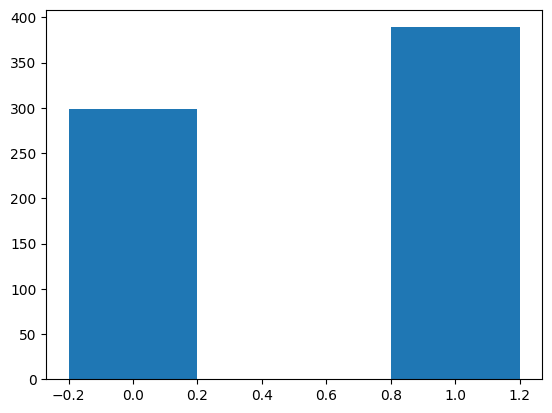

In [ ]:
vals_dict  = df['HeartDisease'].value_counts().to_dict()
plt.bar(list(vals_dict.keys()), list(vals_dict.values()),
        width = 0.4)

In [ ]:
df['HeartDisease']= df['HeartDisease'].astype(int)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,PatientId
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,53.380814,132.904070,200.460756,0.238372,136.594477,0.901017,0.565407,451.779070
std,9.400690,18.025038,110.493566,0.426398,25.679580,1.061356,0.496064,260.959924
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,119.000000,0.000000,0.000000,230.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,446.500000
75%,60.000000,140.000000,267.250000,0.000000,155.000000,1.500000,1.000000,681.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,4.400000,1.000000,916.000000


**Looking for Null values**

<Axes: >

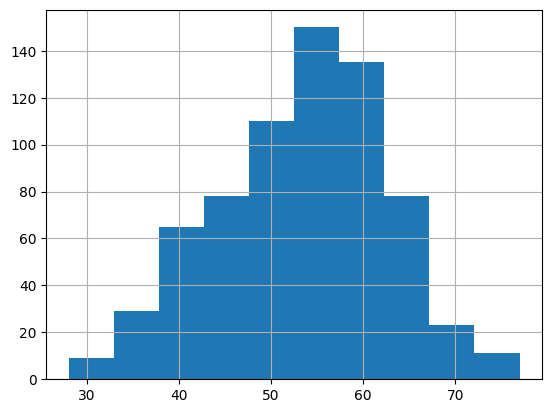

In [ ]:
df['Age'].hist()

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
PatientId         0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             688 non-null    int64  
 1   Sex             688 non-null    object 
 2   ChestPainType   688 non-null    object 
 3   RestingBP       688 non-null    int64  
 4   Cholesterol     688 non-null    int64  
 5   FastingBS       688 non-null    int64  
 6   RestingECG      688 non-null    object 
 7   MaxHR           688 non-null    int64  
 8   ExerciseAngina  688 non-null    object 
 9   Oldpeak         688 non-null    float64
 10  ST_Slope        688 non-null    object 
 11  HeartDisease    688 non-null    int64  
 12  PatientId       688 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 70.0+ KB


**Encoding Categorial Columns**

In [ ]:
one_hot_encoded = pd.get_dummies(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

In [ ]:
print(one_hot_encoded)

     Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0        0      1                  0                  1                  0   
1        0      1                  1                  0                  0   
2        0      1                  1                  0                  0   
3        1      0                  0                  1                  0   
4        0      1                  1                  0                  0   
..     ...    ...                ...                ...                ...   
683      0      1                  1                  0                  0   
684      0      1                  1                  0                  0   
685      0      1                  1                  0                  0   
686      0      1                  1                  0                  0   
687      1      0                  1                  0                  0   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  Resti

In [ ]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,M,ATA,131,0,0,Normal,130,N,0.1,...,0,0,0,1,0,1,0,0,0,1
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,...,0,0,0,1,0,0,1,0,0,1
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,...,0,0,0,1,0,0,1,0,0,1
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,...,0,0,0,1,0,0,1,0,0,1
4,53,M,ASY,125,0,1,Normal,120,N,1.5,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
df = df.drop(columns=['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
y= df['HeartDisease']

In [ ]:
df=df.drop(columns=['HeartDisease'])

In [ ]:
df


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,PatientId,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,131,0,0,130,0.1,474,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,60,135,0,0,63,0.5,370,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,50,150,215,0,140,0.0,205,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,61,140,298,1,120,0.0,544,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,53,125,0,1,120,1.5,302,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,51,131,152,1,130,1.0,580,0,1,1,...,0,0,1,0,0,0,1,0,1,0
684,52,125,212,0,168,1.0,709,0,1,1,...,0,0,0,1,0,1,0,0,0,1
685,41,104,0,0,111,0.0,459,0,1,1,...,0,0,0,0,1,1,0,0,0,1
686,56,140,0,1,121,1.8,317,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
683    1
684    1
685    0
686    1
687    1
Name: HeartDisease, Length: 688, dtype: int64

In [ ]:
X = df.values

In [ ]:
X

array([[ 62., 131.,   0., ...,   0.,   0.,   1.],
       [ 60., 135.,   0., ...,   0.,   0.,   1.],
       [ 50., 150., 215., ...,   0.,   0.,   1.],
       ...,
       [ 41., 104.,   0., ...,   0.,   0.,   1.],
       [ 56., 140.,   0., ...,   0.,   0.,   1.],
       [ 33., 100., 246., ...,   0.,   1.,   0.]])

In [ ]:
X.shape

(688, 21)

In [ ]:
y= y.values

In [ ]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,



---



# Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(550, 21)

In [ ]:
X_test.shape

(138, 21)



---
# Normalization


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_train

array([[-0.15105258, -0.28675153,  0.06249876, ..., -0.26069362,
        -1.0146528 ,  1.15347669],
       [-0.04357662, -0.17533271, -0.14269441, ..., -0.26069362,
        -1.0146528 ,  1.15347669],
       [-1.54824011,  0.3817614 ,  1.09738604, ..., -0.26069362,
        -1.0146528 ,  1.15347669],
       ...,
       [-2.08561993,  0.3817614 , -0.37465191, ..., -0.26069362,
         0.98555881, -0.86694426],
       [ 1.13865899,  0.66030846,  0.12494885, ..., -0.26069362,
         0.98555881, -0.86694426],
       [ 0.06389935,  0.3817614 , -0.28543749, ..., -0.26069362,
         0.98555881, -0.86694426]])

In [ ]:
X_test = sc.transform(X_test)



---
# Model Selection - Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the testing data

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy

0.8478260869565217

In [ ]:
precision

0.8482598434745297

In [ ]:
recall

0.8478260869565217



---

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier()

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model2.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy

0.7608695652173914

In [ ]:
precision

0.7630494950523461

In [ ]:
recall

0.7608695652173914

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model3.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy

0.8188405797101449



---
# Prediction on Test Data


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,PatientId
0,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,688
1,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,297
2,60,F,TA,150,240,0,Normal,171,N,0.9,Up,678
3,51,F,NAP,140,308,0,LVH,142,N,1.5,Up,859
4,61,M,TA,134,234,0,Normal,145,N,2.6,Flat,628


In [ ]:
test_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
PatientId         0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             230 non-null    int64  
 1   Sex             230 non-null    object 
 2   ChestPainType   230 non-null    object 
 3   RestingBP       230 non-null    int64  
 4   Cholesterol     230 non-null    int64  
 5   FastingBS       230 non-null    int64  
 6   RestingECG      230 non-null    object 
 7   MaxHR           230 non-null    int64  
 8   ExerciseAngina  230 non-null    object 
 9   Oldpeak         230 non-null    float64
 10  ST_Slope        230 non-null    object 
 11  PatientId       230 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 21.7+ KB


In [ ]:
one_hot_encoded = pd.get_dummies(test_df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

In [ ]:
one_hot_encoded

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,0,0,0,1,0,0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1
3,1,0,0,0,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0,1,1,0,0,0,0,1,0,0,1,0,1,0
226,0,1,1,0,0,0,0,1,0,0,1,0,1,0
227,1,0,1,0,0,0,0,1,0,1,0,0,0,1
228,0,1,1,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
test_df = pd.concat([test_df, one_hot_encoded], axis=1)
test_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,76,F,NAP,140,197,0,ST,116,N,1.1,...,1,0,0,0,1,1,0,0,1,0
1,57,M,ASY,110,0,1,ST,131,Y,1.4,...,0,0,0,0,1,0,1,0,0,1
2,60,F,TA,150,240,0,Normal,171,N,0.9,...,0,1,0,1,0,1,0,0,0,1
3,51,F,NAP,140,308,0,LVH,142,N,1.5,...,1,0,1,0,0,1,0,0,0,1
4,61,M,TA,134,234,0,Normal,145,N,2.6,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,57,M,ASY,152,274,0,Normal,88,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
226,70,M,ASY,140,0,1,Normal,157,Y,2.0,...,0,0,0,1,0,0,1,0,1,0
227,45,F,ASY,132,297,0,Normal,144,N,0.0,...,0,0,0,1,0,1,0,0,0,1
228,50,M,ASY,115,0,0,Normal,120,Y,0.5,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
PatientID = test_df['PatientId']

In [ ]:
test_df = test_df.drop(columns=['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
Test_X = test_df.values
Test_X

array([[ 76., 140., 197., ...,   0.,   1.,   0.],
       [ 57., 110.,   0., ...,   0.,   0.,   1.],
       [ 60., 150., 240., ...,   0.,   0.,   1.],
       ...,
       [ 45., 132., 297., ...,   0.,   0.,   1.],
       [ 50., 115.,   0., ...,   0.,   1.,   0.],
       [ 47., 130., 253., ...,   0.,   0.,   1.]])

In [ ]:
Test_X.shape

(230, 21)

In [ ]:
print("Training data shape:", X_train.shape)  # Assuming train_X is your training features
print("Test data shape:", Test_X.shape)


Training data shape: (550, 21)
Test data shape: (230, 21)


In [ ]:
Test_X = sc.transform(Test_X)
y_pred_test = model3.predict(Test_X)

In [ ]:
y_pred_test

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

# Create Submission DataFrame

In [ ]:
df_submission = pd.DataFrame({'PatientId': PatientID, 'HeartDisease': y_pred_test})

In [ ]:
df_submission

,PatientId,HeartDisease
0,688,1
1,297,1
2,678,0
3,859,0
4,628,1
...,...,...
225,737,1
226,378,1
227,66,0
228,381,1


In [ ]:
df_submission.to_csv('submissionFinal.csv', index=False)
